   time          x1         x2         x3          y
0     1  119.646919  65.918971  31.705437  98.119617
1     2   78.613933  76.663719  12.670978  74.771058
2     3   72.685145  37.413594  36.134595  67.897556
3     4  105.131477  39.162647  49.843453  75.693546
4     5  121.946897  52.538642  40.775893  81.551865
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           5.79e-33
Time:                        21:50:37   Log-Likelihood:                -336.17
No. Observations:                 100   AIC:                             680.3
Df Residuals:                      96   BIC:                             690.8
Df Model:                           3             

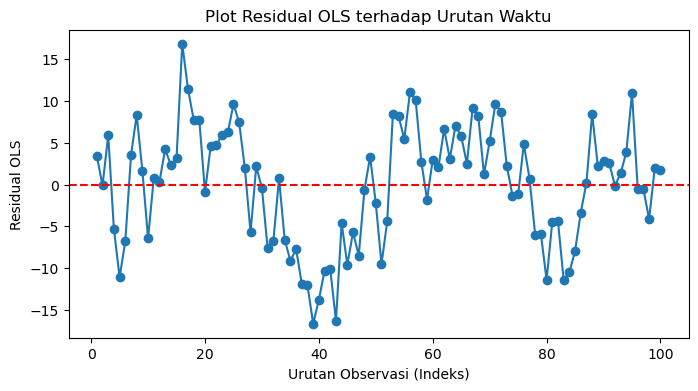

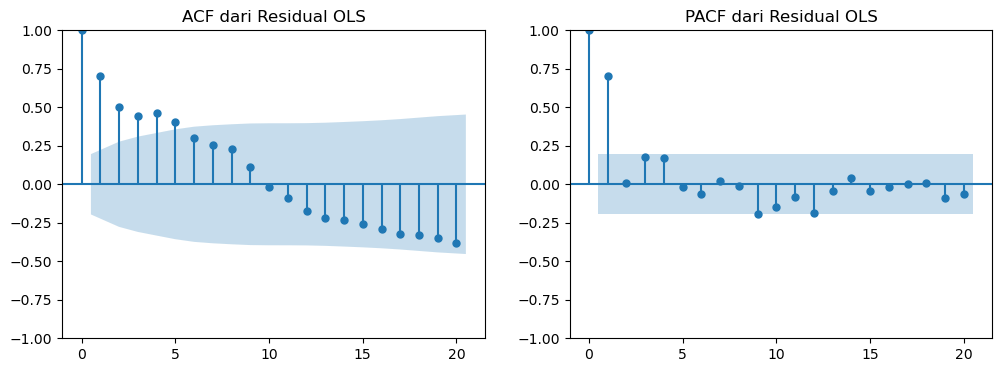

In [5]:
# ===============================
# AUTOKORELASI
# ===============================
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

np.random.seed(123)
n = 100

# Variabel independen
x1 = np.random.uniform(50, 150, n)  # Iklan TV
x2 = np.random.uniform(30, 100, n)  # Iklan Radio
x3 = np.random.uniform(10, 50, n)   # Variabel lain

# AR(1) error
rho = 0.7
e = np.zeros(n)
e[0] = np.random.normal(0, 5)
for t in range(1, n):
    e[t] = rho*e[t-1] + np.random.normal(0, 5)

# Variabel dependen
beta0, beta1, beta2, beta3 = 10, 0.5, 0.3, 0.2
y = beta0 + beta1*x1 + beta2*x2 + beta3*x3 + e

# Dataframe
data_autokorelasi = pd.DataFrame({'time': range(1,n+1), 'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
print(data_autokorelasi.head())

# Model OLS
X = sm.add_constant(data_autokorelasi[['x1','x2','x3']])
model_ols = sm.OLS(data_autokorelasi['y'], X).fit()
print(model_ols.summary())

# Durbin-Watson Test
dw = durbin_watson(model_ols.resid)
print(f"Durbin-Watson statistic: {dw}")

# Visualisasi residual
residuals_ols = model_ols.resid
plt.figure(figsize=(8,4))
plt.plot(range(1,n+1), residuals_ols, marker='o')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Urutan Observasi (Indeks)")
plt.ylabel("Residual OLS")
plt.title("Plot Residual OLS terhadap Urutan Waktu")
plt.show()

# ACF dan PACF
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(residuals_ols, ax=axes[0], lags=20)
axes[0].set_title("ACF dari Residual OLS")
plot_pacf(residuals_ols, ax=axes[1], lags=20)
axes[1].set_title("PACF dari Residual OLS")
plt.show()

       Iklan_Tv   Iklan_Radio    Endorse     Penjualan
0  1.196469e+07  1.272126e+07  31.705437  9.798751e+06
1  7.861393e+06  8.694706e+06  12.670978  6.539129e+06
2  7.268515e+06  7.821469e+06  36.134595  5.980728e+06
3  1.051315e+07  1.107860e+07  49.843453  8.580172e+06
4  1.219469e+07  1.285568e+07  40.775893  9.954070e+06
--- Hasil Uji VIF untuk Multikolinearitas ---
          VIF     Variabel
0   53.588881        const
1  300.372224     Iklan_Tv
2  300.349476  Iklan_Radio
3    1.009033      Endorse
             Iklan_Tv  Iklan_Radio   Endorse
Iklan_Tv     1.000000     0.998319 -0.009656
Iklan_Radio  0.998319     1.000000 -0.004185
Endorse     -0.009656    -0.004185  1.000000


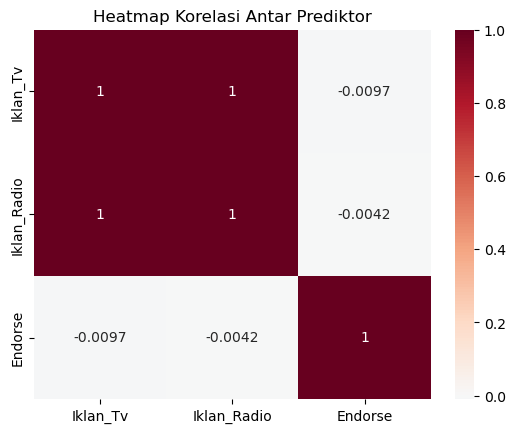

In [6]:
# ===============================
# MULTIKOLINEARITAS
# ===============================
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

np.random.seed(123)
x1 = np.random.uniform(5_000_000, 15_000_000, n)
x2 = x1 + np.random.uniform(500_000, 1_000_000, n)
x3 = np.random.uniform(10, 50, n)
beta0, beta1, beta2, beta3 = 20, 0.5, 0.3, 0.2
y = beta0 + beta1*x1 + beta2*x2 + beta3*x3 + np.random.normal(0, 5, n)

data_multikol = pd.DataFrame({'Iklan_Tv': x1, 'Iklan_Radio': x2, 'Endorse': x3, 'Penjualan': y})
print(data_multikol.head())

# VIF
X_vif = sm.add_constant(data_multikol[['Iklan_Tv','Iklan_Radio','Endorse']])
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif["Variabel"] = X_vif.columns
print("--- Hasil Uji VIF untuk Multikolinearitas ---")
print(vif)

# Matriks Korelasi
cor_matrix = data_multikol[['Iklan_Tv','Iklan_Radio','Endorse']].corr()
print(cor_matrix)

# Heatmap korelasi
sns.heatmap(cor_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title("Heatmap Korelasi Antar Prediktor")
plt.show()

Shapiro-Wilk Test: W=0.9933, p-value=0.9033


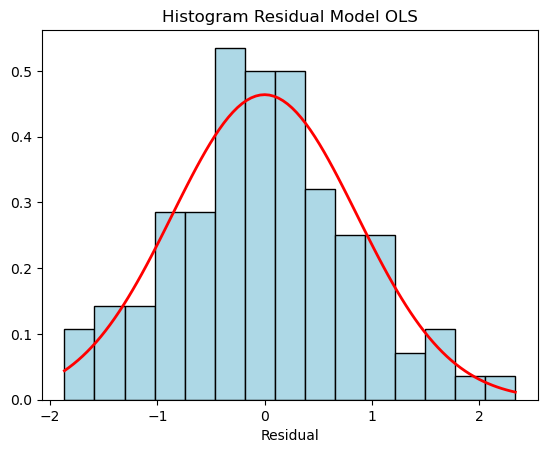

In [7]:
# ===============================
# SISAAAN NORMAL BAKU
# ===============================
from scipy.stats import shapiro

np.random.seed(123)
x1 = np.random.normal(0,1,n)
x2 = np.random.normal(0,1,n)
x3 = np.random.normal(0,1,n)
beta0, beta1, beta2, beta3 = 0,0.5,0.3,0.2
y = beta0 + beta1*x1 + beta2*x2 + beta3*x3 + np.random.normal(0,1,n)
data_normal = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

X_norm = sm.add_constant(data_normal[['x1','x2','x3']])
model_ols_norm = sm.OLS(data_normal['y'], X_norm).fit()
residuals_norm = model_ols_norm.resid

# Shapiro-Wilk Test
stat, p = shapiro(residuals_norm)
print(f"Shapiro-Wilk Test: W={stat:.4f}, p-value={p:.4f}")

# Histogram
plt.hist(residuals_norm, bins=15, density=True, color='lightblue', edgecolor='black')
xfit = np.linspace(residuals_norm.min(), residuals_norm.max(), 100)
yfit = (1/(residuals_norm.std()*np.sqrt(2*np.pi)))*np.exp(-(xfit-residuals_norm.mean())**2/(2*residuals_norm.std()**2))
plt.plot(xfit, yfit, color='red', lw=2)
plt.title("Histogram Residual Model OLS")
plt.xlabel("Residual")
plt.show()

{'LM Statistic': np.float64(15.260060755287451), 'LM-Test p-value': np.float64(0.0016073704844230467), 'F-Statistic': np.float64(5.762594928927425), 'F-Test p-value': np.float64(0.00114621432121078)}


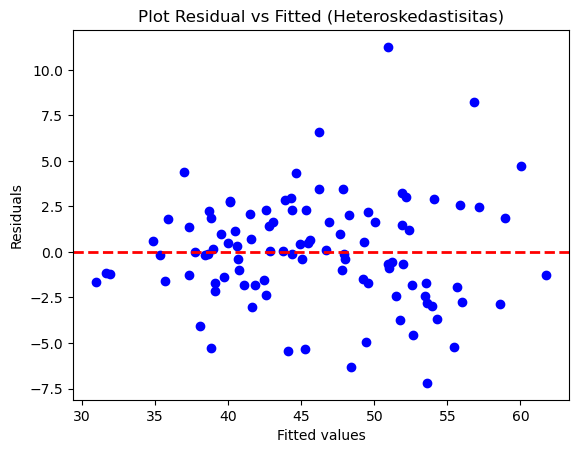

In [8]:
# ===============================
# HETEROSKEDASTISITAS
# ===============================
from statsmodels.stats.diagnostic import het_breuschpagan

np.random.seed(123)
x1 = np.random.uniform(1,10,n)
x2 = np.random.uniform(5,15,n)
x3 = np.random.uniform(10,20,n)
error = np.random.normal(0, 0.5*x1, n)
beta0, beta1, beta2, beta3 = 5,2,1.5,1
y = beta0 + beta1*x1 + beta2*x2 + beta3*x3 + error
data_hetero = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'y':y})

X_het = sm.add_constant(data_hetero[['x1','x2','x3']])
model_ols_het = sm.OLS(data_hetero['y'], X_het).fit()

# Breusch-Pagan Test
bp_test = het_breuschpagan(model_ols_het.resid, model_ols_het.model.exog)
labels = ['LM Statistic','LM-Test p-value','F-Statistic','F-Test p-value']
print(dict(zip(labels, bp_test)))

# Visualisasi residual vs fitted
plt.scatter(model_ols_het.fittedvalues, model_ols_het.resid, color='blue')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Plot Residual vs Fitted (Heteroskedastisitas)")
plt.show()